In [ ]:

# Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Image (#50): Which is digit '3'


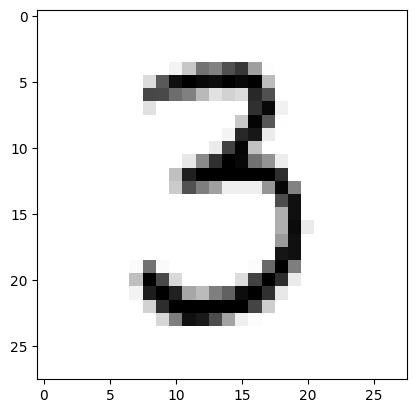

In [ ]:
digit = 50 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

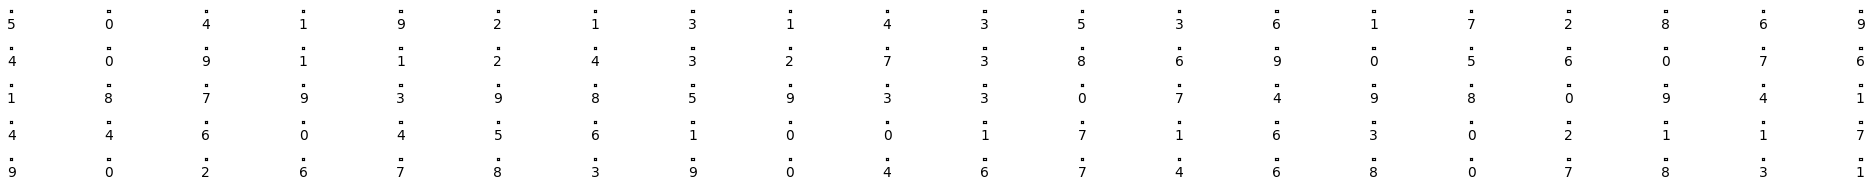

In [ ]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(20,2))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [ ]:
# Normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
# Add channel dimension (28,28,1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)

# Build CNN model

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.summary()

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Save model for later webcam demo
model.save("mnist_model.h5")


Train shape: (60000, 28, 28, 1) Test shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.8444 - loss: 0.5007 - val_accuracy: 0.9857 - val_loss: 0.0508
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9779 - loss: 0.0740 - val_accuracy: 0.9897 - val_loss: 0.0373
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9867 - loss: 0.0475 - val_accuracy: 0.9907 - val_loss: 0.0344
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.9884 - loss: 0.0379 - val_accuracy: 0.9893 - val_loss: 0.0346
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9912 - loss: 0.0296 - val_accuracy: 0.9912 - val_loss: 0.0325
313/313 - 2s - 7ms/step - accuracy: 0.9934 - loss: 0.0245



Test accuracy: 0.993399977684021


In [ ]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9922 - loss: 0.0271 - val_accuracy: 0.9909 - val_loss: 0.0304
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9934 - val_loss: 0.0233
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.9950 - loss: 0.0168 - val_accuracy: 0.9941 - val_loss: 0.0248
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9945 - loss: 0.0154 - val_accuracy: 0.9917 - val_loss: 0.0320
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9964 - loss: 0.0127 - val_accuracy: 0.9912 - val_loss: 0.0347


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9868 - loss: 0.0500

Test accuracy: 0.9902999997138977


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


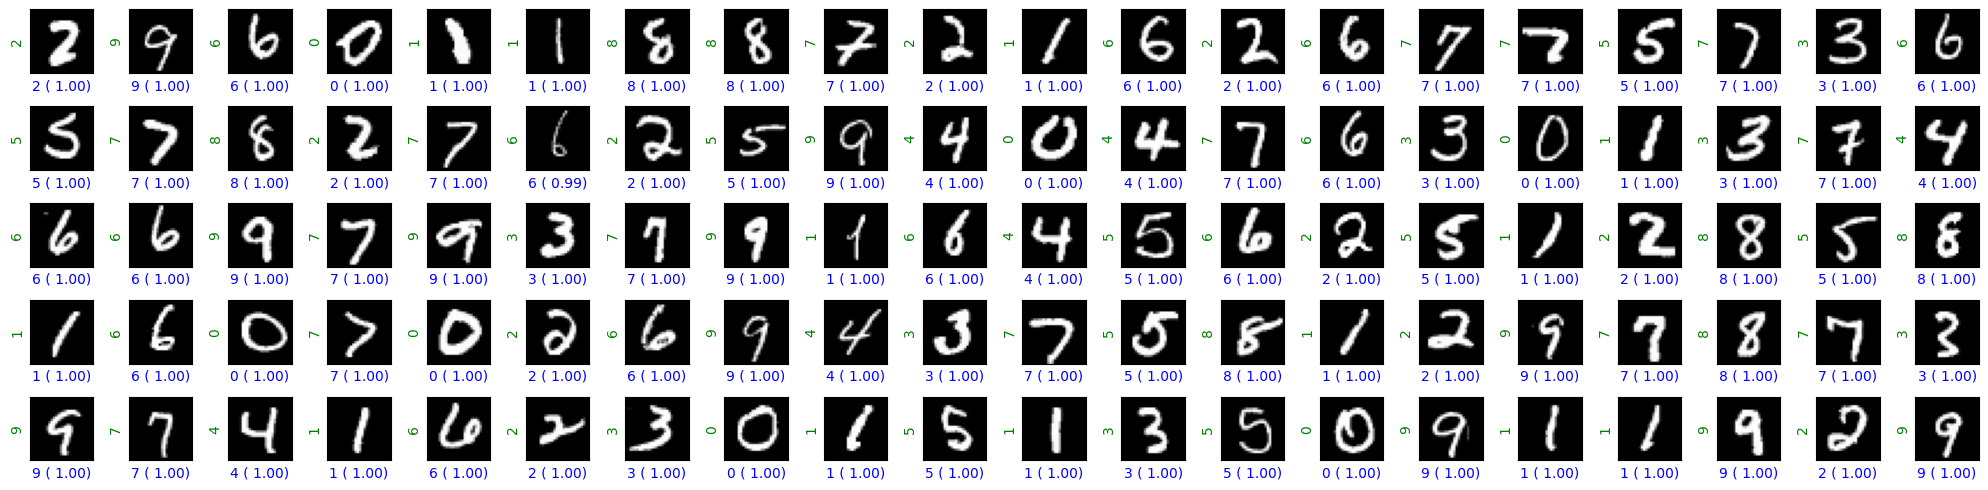

In [ ]:
import random
import numpy as np

predictions = model.predict(x_test)
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
def test(i):
    img = x_test[i]
    predictions = model.predict(img.reshape(1, 28, 28, 1))

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions)
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


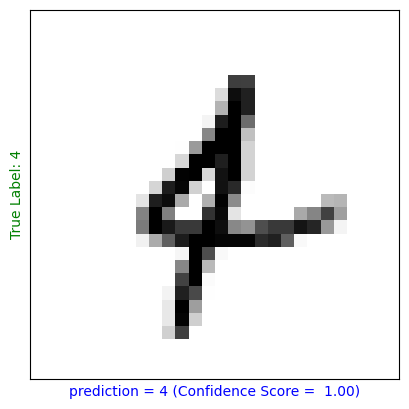

In [ ]:
test(300)